### H_tree check

In [1]:
from src.Planners.H_MCTS import H_MCTS
from src.Planners.H_MCTS import H_Node

import math
import pandas as pd

In [2]:
l1_rows = 8
l1_cols = 8
l1_width = 2
l1_height = 2
# H_level = 2
num_barrier = 20
random_seed= 25

explorationConstant = 1 / math.sqrt(2)
grid_setting = (l1_rows, l1_cols, l1_width, l1_height)

iter_Limit = 10000

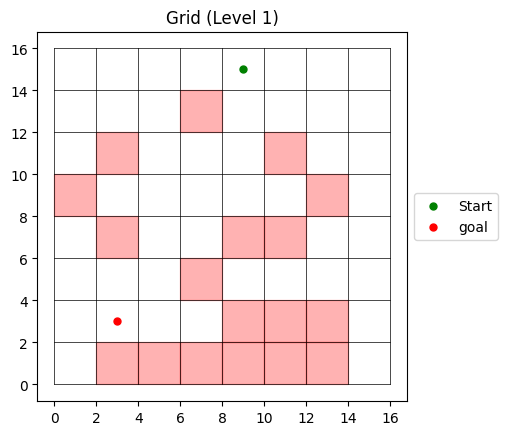

10 with [(1, 4, 7), (1, 4, 6), (1, 4, 5), (1, 3, 5), (1, 3, 4), (1, 2, 4), (1, 2, 3), (1, 2, 2), (1, 1, 2), (1, 1, 1)] H-MCTS
10 with [(1, 4, 7), (1, 4, 6), (1, 5, 6), (1, 6, 6), (1, 5, 6), (1, 6, 6), (1, 7, 6), (1, 6, 6), (1, 6, 5)] plain-MCTS
-----------------------------------------------------------------------------------------


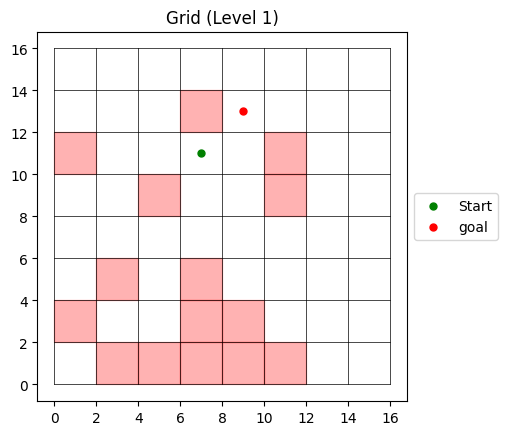

11 with [(1, 3, 5), (1, 4, 5), (1, 4, 6)] H-MCTS
11 with [(1, 3, 5), (1, 4, 5), (1, 4, 6)] plain-MCTS
-----------------------------------------------------------------------------------------


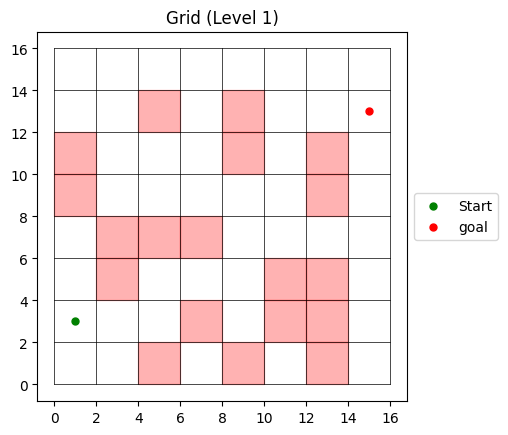

KeyboardInterrupt: 

In [3]:
r = 0
dead_list = [16, 18, 24, 26, 33, 37, 54, 56]

total_H = []
total_plain = []

for random_seed in range(10, 68):
    if random_seed in dead_list:
        continue
    else:
        
        H_level = 2
        mcts = H_MCTS(grid_setting, iter_Limit=iter_Limit, H_level=H_level, explorationConstant=explorationConstant, num_barrier=num_barrier, random_seed=random_seed)
        mcts.Env.plot_grid(1)
        H_traj, H_reward = mcts.search()
        print(f'{random_seed} with {H_traj} H-MCTS')
        total_H.append(H_reward)
        
        H_level = 1
        mcts = H_MCTS(grid_setting, iter_Limit=iter_Limit, H_level=H_level, explorationConstant=explorationConstant, num_barrier=num_barrier, random_seed=random_seed)
        plain_traj, plain_reward = mcts.search()
        print(f'{random_seed} with {plain_traj} plain-MCTS')
        total_plain.append(plain_reward)
        print('-----------------------------------------------------------------------------------------')

In [ ]:
failed_cases = [20, 32, 36, 43, 51, 52, 58, 64, 66, 67]  # at 1 / sqrt(2)
explorationConstant = 10 / math.sqrt(2)
iter_Limit = 40000

for random_seed in failed_cases:
    H_level = 2
    mcts = H_MCTS(grid_setting, iter_Limit=iter_Limit, H_level=H_level, explorationConstant=explorationConstant, num_barrier=num_barrier, random_seed=random_seed)
    mcts.Env.plot_grid(1)
    H_traj, H_reward = mcts.search()
    print(f'{random_seed} with {H_traj} H-MCTS')
    total_H.append(H_reward)

    H_level = 1
    mcts = H_MCTS(grid_setting, iter_Limit=iter_Limit, H_level=H_level, explorationConstant=explorationConstant, num_barrier=num_barrier, random_seed=random_seed)
    plain_traj, plain_reward = mcts.search()
    print(f'{random_seed} with {plain_traj} plain-MCTS')
    total_plain.append(plain_reward)
    print('-----------------------------------------------------------------------------------------')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate two random DataFrames with 50 rows and 10000 columns
df1 = pd.DataFrame(total_H)
df2 = pd.DataFrame(total_plain)

# Calculate the average separately for each column
average_df1 = df1.mean(axis=0)
average_df2 = df2.mean(axis=0)

# Calculate the standard deviation separately for each column
std_dev_df1 = df1.std(axis=0)
std_dev_df2 = df2.std(axis=0)

# Plot the averages as line charts
plt.plot(range(10000), average_df1, label='H-MCTS')
plt.plot(range(10000), average_df2, label='Plain-MCTS')

# Show the deviation as shaded regions
plt.fill_between(range(10000), average_df1 - std_dev_df1, average_df1 + std_dev_df1, alpha=0.3)
plt.fill_between(range(10000), average_df2 - std_dev_df2, average_df2 + std_dev_df2, alpha=0.3)

plt.xlabel('Iterations')
plt.ylabel('Average Sum of reward')
plt.title('H-MCTS   VS   Plain-MCTS')
plt.legend()
plt.show()

